# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = '\\Results\\f1_d5_GA\\Training d2-d11\\'
Add_on_path = "\\Results\\f1-f3_d2-d11\\"
#Add_on_path = "\\Results\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')


In [4]:
print(df_Exp_Profit)
print(df_RT_Profit)

         f3_d9_upd37_t38  f3_d9_upd71_t72  f3_d4_upd68_t69  f3_d5_upd86_t87   
sto          2636.258451      3597.862588      3251.732773      2585.097760  \
det          9043.757125      7788.383265      7010.303346      6848.491124   
oracle       7527.172895      4714.636129      4065.967751      4701.982779   
feature      2082.184267      3725.254955      3623.160043      2251.182010   
rule         1466.058177      3301.320351      2595.208879      2786.050936   

         f1_d7_upd43_t44  f1_d4_upd21_t22  f1_d9_upd7_t8  f3_d2_upd80_t81   
sto          2420.739956      3650.815790    1115.527107      4804.796083  \
det          2880.724870      4703.808320    5003.836282      9635.992638   
oracle       7260.936487      6643.026376    5146.257395      3697.395809   
feature      2466.128209      3484.963599    3487.815238      3812.968232   
rule         2385.632783      3289.739021    3874.271885      3651.536394   

         f2_d7_upd64_t65  f2_d2_upd67_t68  ...  f1_d4_upd72_t7

In [12]:
SampleSizes = [2,4,5,7,9,11]
forecast = [1,2,3]
visualize_forecasts = True
xtick_names = forecast
training_data = [5]
index = np.where(np.array(SampleSizes) == training_data[0])[0]
print(index)
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=3, SampleSizes=SampleSizes)

[2]


In [14]:

def plot_profit_Test(Array, PlotCase, Forecast_selection, SampleSize_selection, barwidth = 0.1, Forecast_label = [1,2,3], SampleSize_label = [2,4,5,7,9,11],ShowEachTestDay = False):

    # Sample data
    #Array = np.random.rand(3, 6, 88, 5, 2)
    # PlotCase = 'Forecast' , 'Sample Size', ''
    #Forecast_names = [1,2,3]
    #SampleSize_names = [2,5,7,9,11]
    


    colors = ['C3', 'C0', 'C2', 'C1']  # Colors for the fourth dimension
    Model = ['Rule', 'Det', 'Sto', 'Feature']
    
    
    mean_values = np.mean(Array, axis=2)
    std_values = np.std(Array, axis=2)

    if PlotCase == 'Forecasts':
        x_axis_label = 'Forecasts'
        x_axis = np.arange(len(Forecast_selection))
        xtick_names = Forecast_label
        bar_count = (Array.shape[3]-1) * Array.shape[4]  # Number of bars in each group (5-1)*2
        

    elif  PlotCase == 'Sample size':
        x_axis_label = 'Sample size'
        x_axis = np.arange(len(SampleSize_selection))
        xtick_names = SampleSize_label
        colors = ['C2', 'C1']  # Colors for the fourth dimension
        Model_mod = ['Sto', 'Feature']
        s_m_idx = [i for i, m in enumerate(Model) if m in Model_mod]
        bar_count = (len(Model_mod)) * Array.shape[4]  # Number of bars in each group (5-1)*2

    else:
        x_axis_label = '' 
        
        xtick_names = 'off'
        Forecastidx = 1 # [1,2,3]
        x_axis = [Forecastidx]
        bar_count = (Array.shape[3]-1) * Array.shape[4]  # Number of bars in each group (5-1)*2

        
    

    # Fixed settings
    #ax.set_ylabel('\u20AC/day')
    y_axis_label = 'Profit [\u20AC/day]'
    test_days = np.arange(Array.shape[2])


    legend_labels = Model
    legend_colors = colors
    linestyle = '-'
    linecolor = 'C4'
    linelabel = 'Oracle'
    edgecolor = "black"
    fill_patterns_label = ['Expected', 'Realized']  # Fill patterns for the fifth dimension
    fill_patterns = ['', '\\']  # Fill patterns for the fifth dimension

    # /   - diagonal hatching
    # \   - back diagonal
    # |   - vertical
    # -   - horizontal
    # +   - crossed
    # x   - crossed diagonal
    # o   - small circle
    # O   - large circle
    # .   - dots
    # *   - stars


    linewidth = 4
    
    size_around_tick = barwidth * bar_count / 2 + barwidth/2

    bar_list = [-(barwidth * bar_count / 2) + i * barwidth for i in range(bar_count)]
    # Compute the means along the third dimension



    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Plot value of the oracle model
    mean_value = np.mean(Array[Forecast_selection, SampleSize_selection, :, 4, 1])
    lines = ax.hlines(mean_value, 0 - size_around_tick, len(x_axis) - 1 + size_around_tick, color=linecolor, linestyle=linestyle, linewidth=linewidth)


    for f,forecast  in enumerate(Forecast_selection):

        for s,sample  in enumerate(SampleSize_selection):
            count_j = 0
            count_k = 0
            for j, color in enumerate(colors):
                for k, fill_pattern in enumerate(fill_patterns):
                    # construct where on the x axis the bar is located
                    if PlotCase == 'forecast':
                        bar_left = f + bar_list[count_k]
                        j_mod = j
                    elif PlotCase == 'Sample size':
                        bar_left = s + bar_list[count_k]
                        j_mod = s_m_idx[j] # Just so only specified models are showed
                        
                    else:
                        bar_left = bar_list[count_k]
                        j_mod = j

                    
                    # Define the height of the bar
                    bar_height = mean_values[forecast,sample,j_mod,k]
                    error_value = std_values[forecast,sample,j_mod,k]

                    

                    ax.bar(bar_left, bar_height, width=barwidth, color=color, hatch=fill_pattern, align='edge', edgecolor=edgecolor)

                    x_position = bar_left + barwidth/2
                    ax.errorbar(x_position, bar_height, yerr=error_value, fmt='none', ecolor='black', capsize=4)

                    if ShowEachTestDay == True:
                        for d,val in enumerate(test_days):
                            #print("(",bar_left,",",Array[x,2,d,j,k],")")
                            
                            ax.scatter(x_position,Array[forecast,sample,d,j,k],s=2, edgecolor=edgecolor, color=color)

                    count_k = count_k + 1
                count_j = count_j + 1




    # Set the x-axis ticks and tick labels
    
    if xtick_names != 'off':
        ax.set_xticks(x_axis)
        ax.set_xticklabels(xtick_names)
        ax.set_xlabel(x_axis_label)
    else:
        # Remove x axis
            
        #ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_xlabel('')

    # Set the y-axis tick size
    ax.tick_params(axis='y', which='major', labelsize=20)
    
    ax.set_ylabel(y_axis_label, fontsize=14, labelpad=10)
    ax.yaxis.set_tick_params(labelsize=10)

    # Create legend for the bars
    legend_handles = []

    for label, color in zip(legend_labels, legend_colors):
        rect = plt.Rectangle((0, 0), 1, 1, color=color, label=label)
        rect.set_edgecolor(edgecolor)
        legend_handles.append(rect)



    for label, pattern in zip(fill_patterns_label, fill_patterns): 
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor=edgecolor,  hatch=pattern, label=label))

    # Create legend for the horizontal line
    legend_handles.append(plt.Line2D([0], [0], color=linecolor, linestyle=linestyle, label=linelabel,linewidth=linewidth))

    # Show the legend
    ax.legend(handles=legend_handles,bbox_to_anchor=(1.02, 1), loc='upper left')


    # Show the plot
    plt.show()

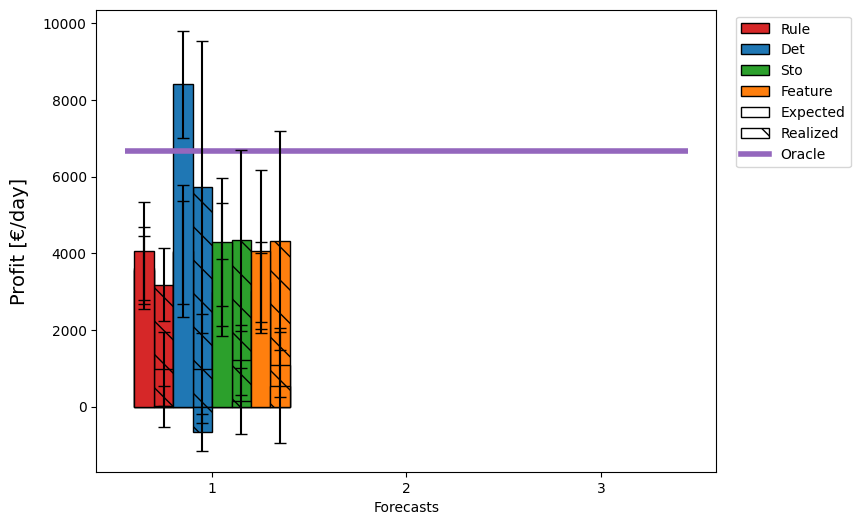

In [16]:
forecast = [1,2,3]
SampleSize = [2,4,5,7,9,11]

plot_profit_Test(Array,'Forecasts', [0,1,2], [2], barwidth = 0.1,  ShowEachTestDay = False)

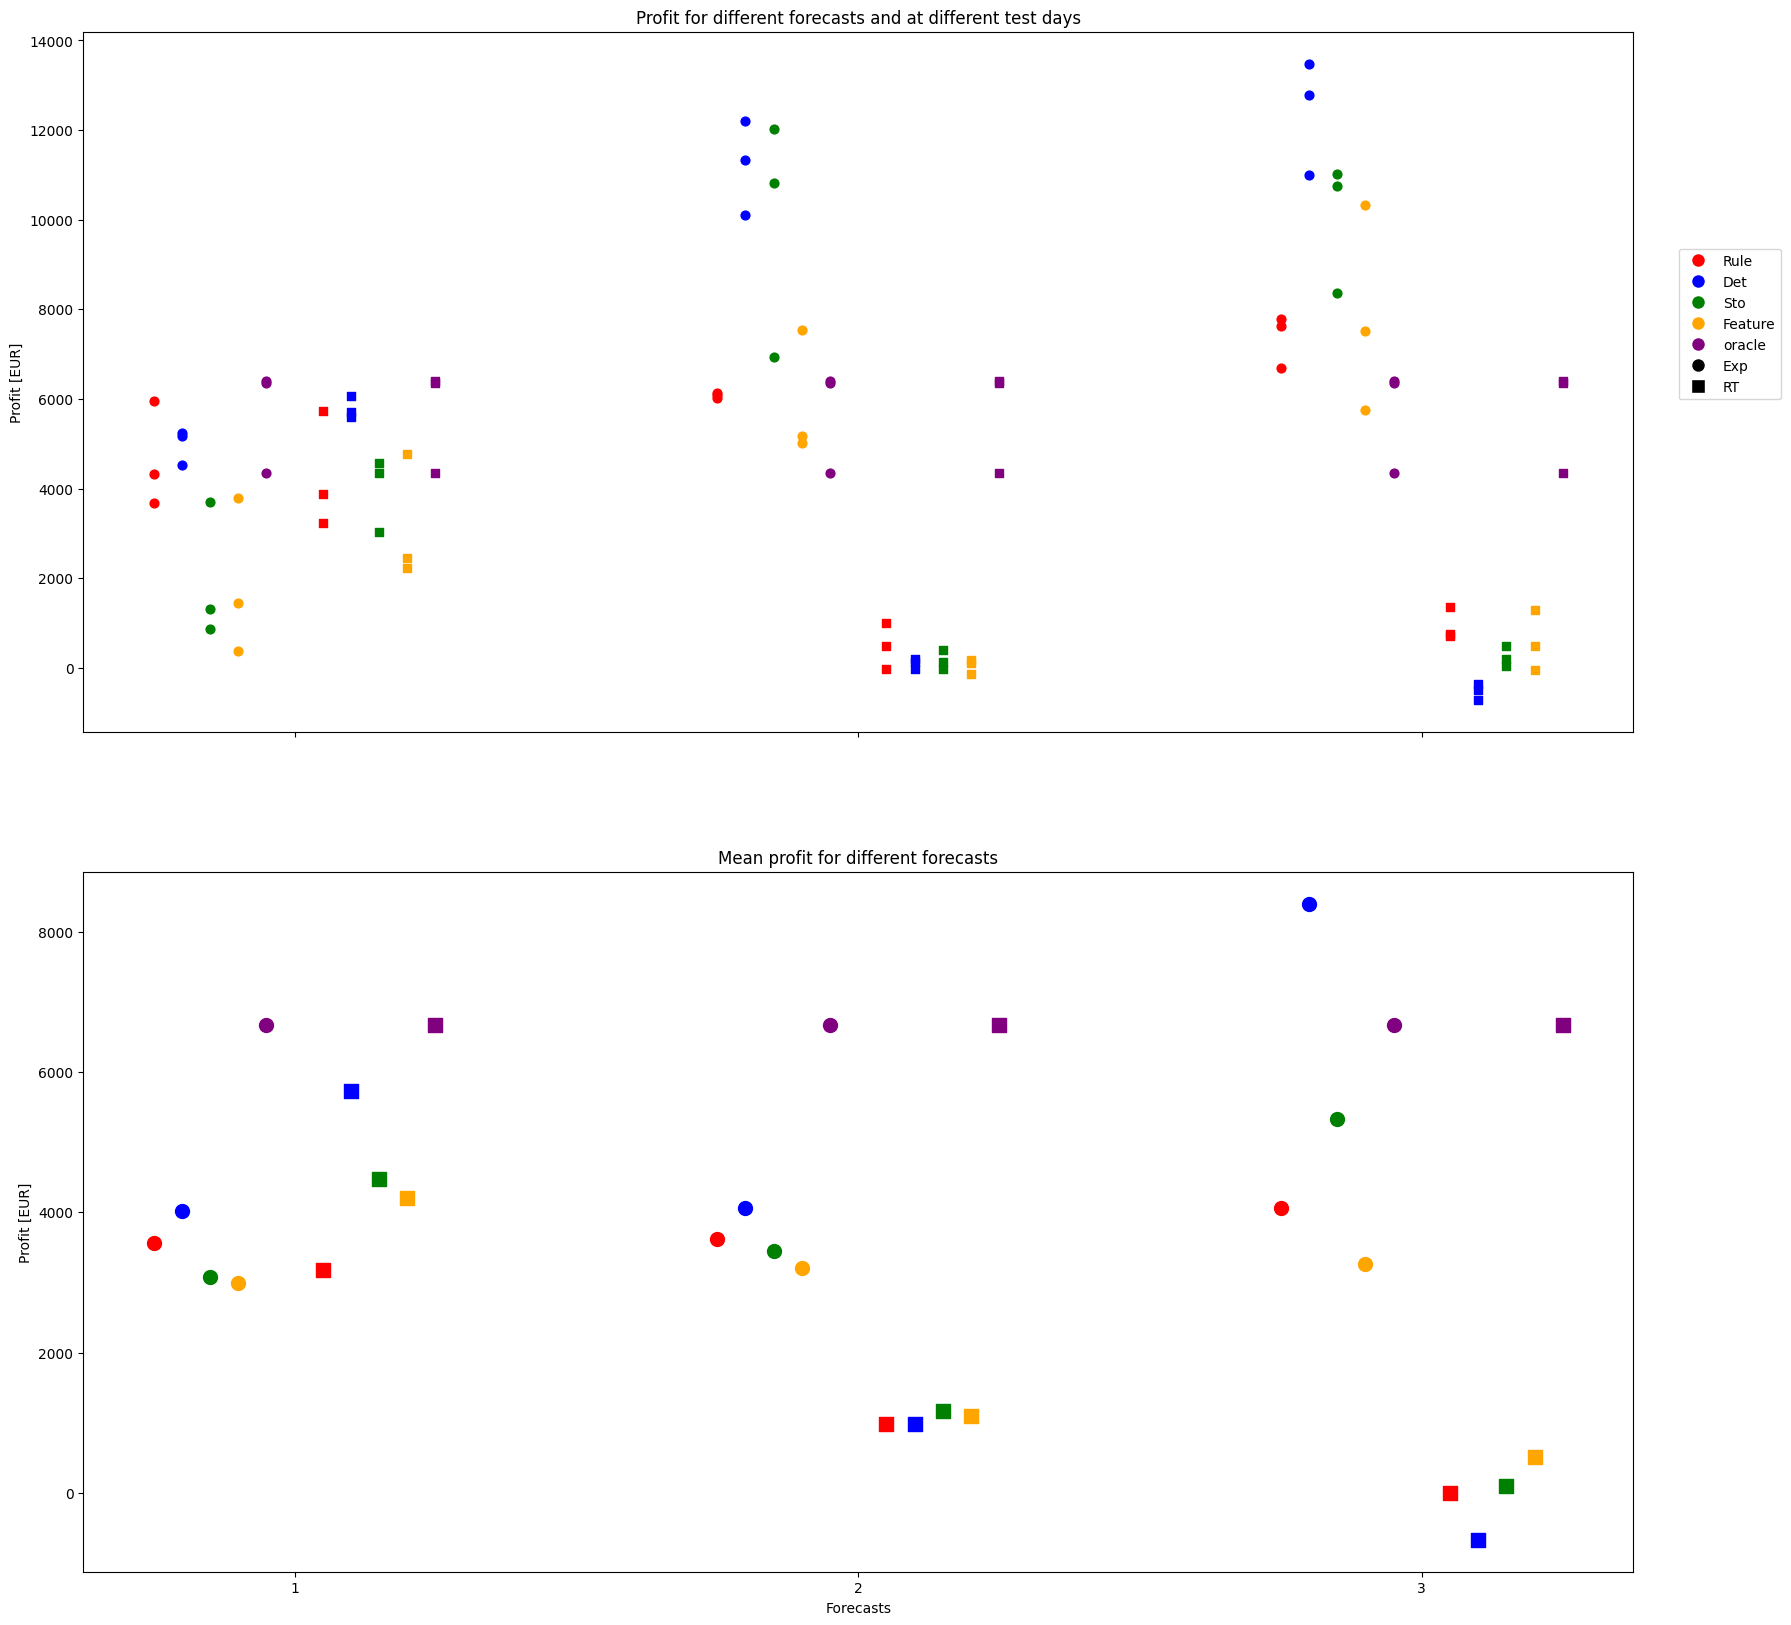

In [10]:
marker_size = 40
marker_size_2 = 100
plot_Profit_Test_For_Forecast(Array,xtick_names = xtick_names,SampleSize_index=0,marker_size = marker_size, marker_size_2 = marker_size_2)

[2]


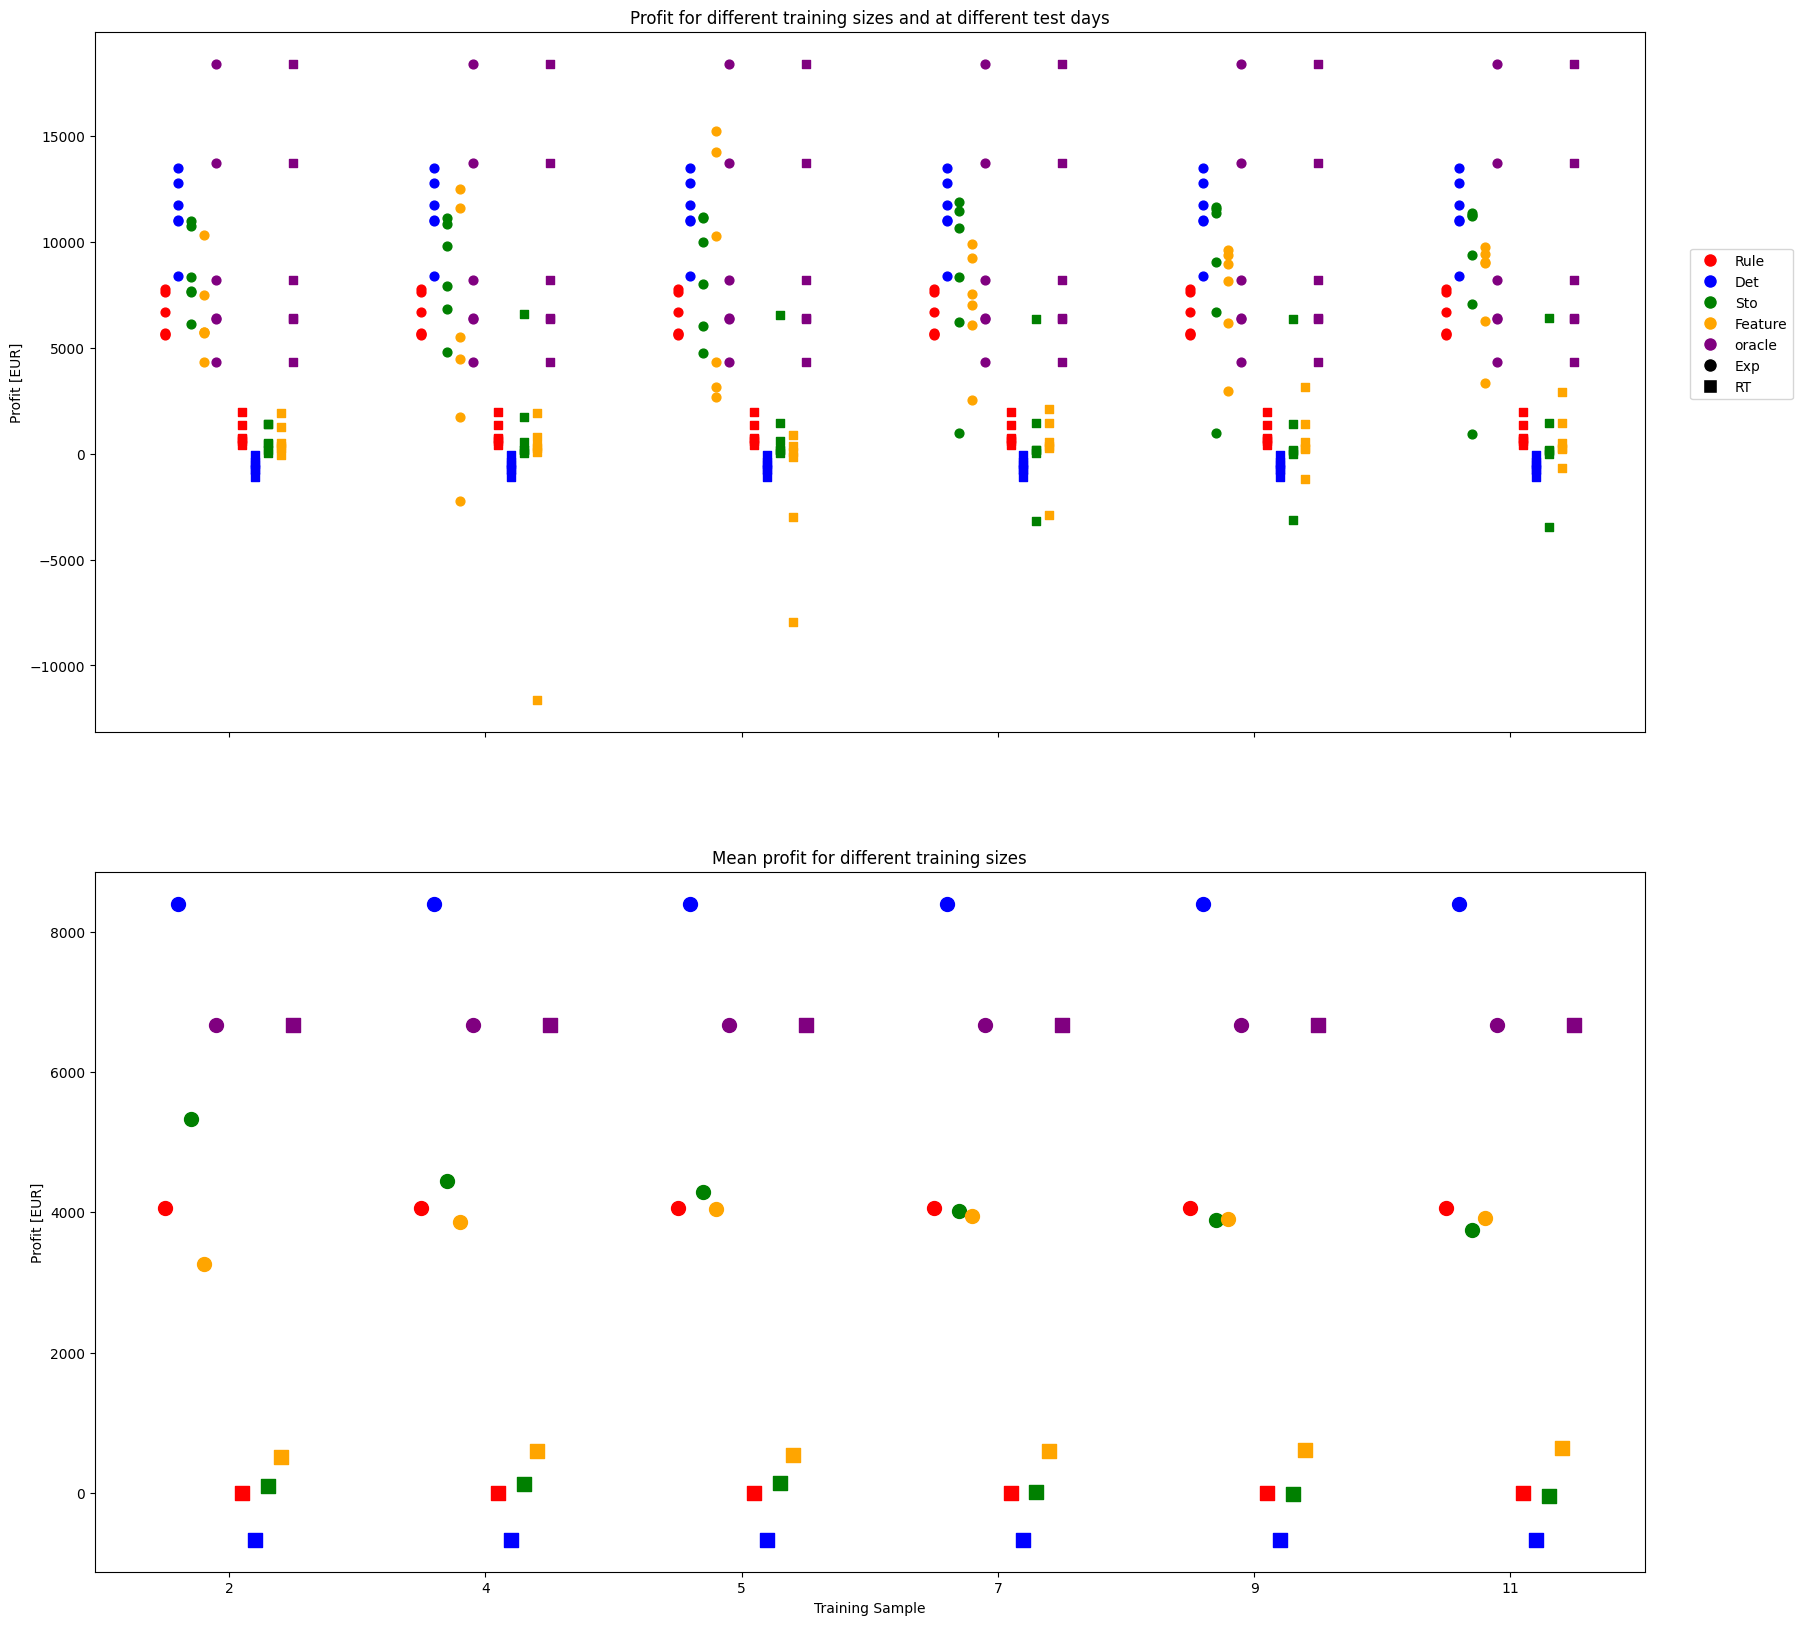

In [11]:
SampleSizes = [2,4,5,7,9,11]
forecast = [1,2,3]
#SampleSizes = [5]
visualize_forecasts = True
xtick_names = SampleSizes
training_data = [3]
index = np.where(np.array(forecast) == training_data[0])[0]
print(index)
marker_size = 40
marker_size_2 = 100
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=3, SampleSizes=SampleSizes)
marker_size = 40
marker_size_2 = 100
plot_Profit_Test_For_SampleSize(Array,xtick_names = xtick_names,Forecast_index=index[0],marker_size = marker_size, marker_size_2 = marker_size_2)

For a fixed training size, see how the different days affects the results

In [8]:
fixd5 = [f'f{1}_d{5}_upd{d}_t{d+1}' for d in range(0,88)]

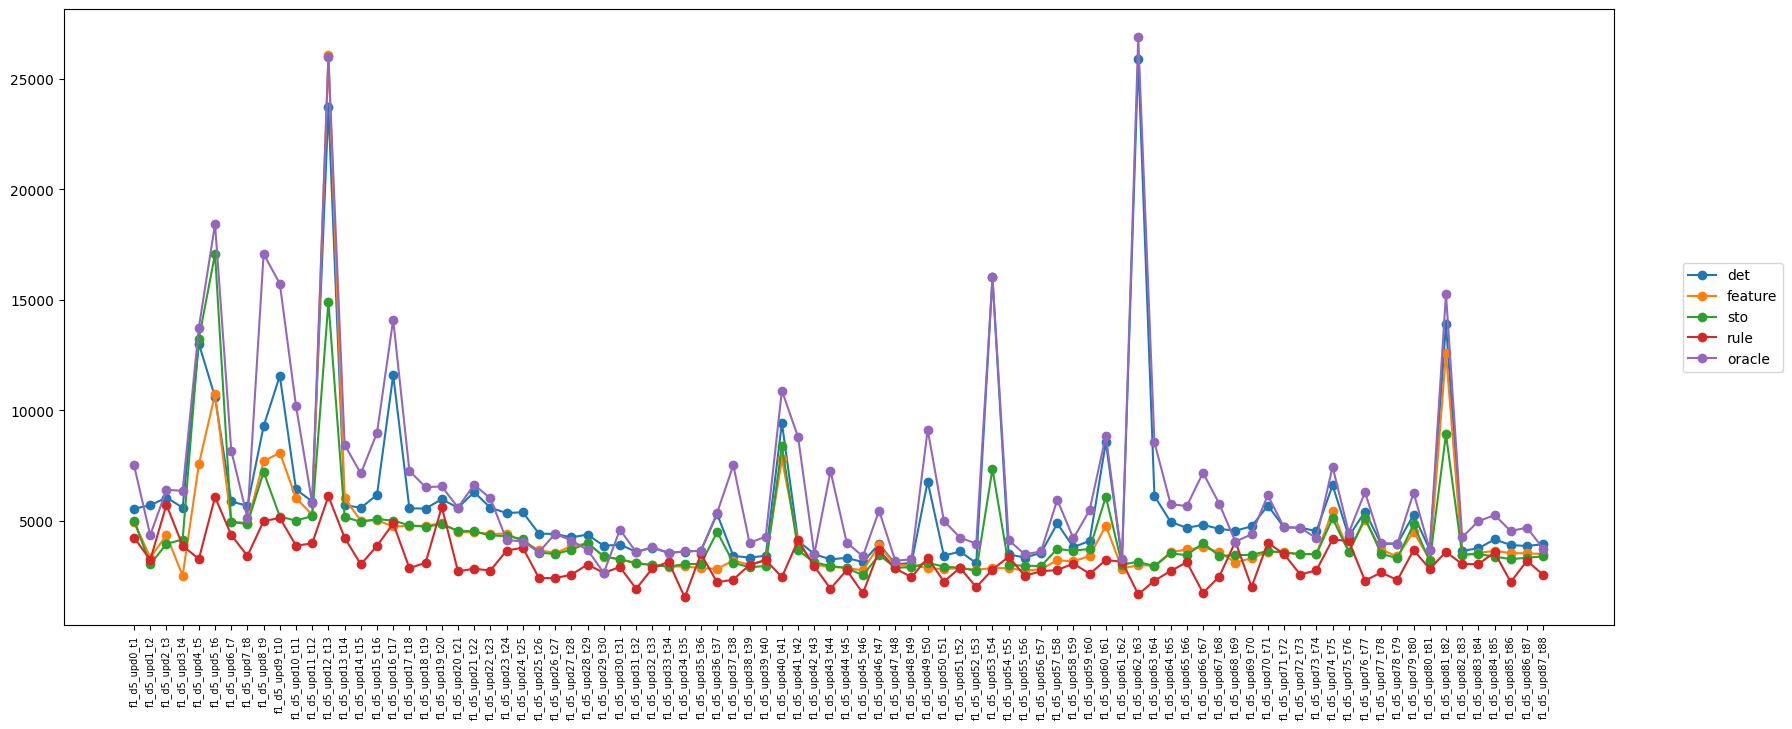

In [9]:
data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule','oracle']
plot = data[models]
plt.figure(figsize=(20,8))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [10]:
df_RT_Profit[fixd5].mean(axis=1)

sto        4332.822489
det        5727.348116
oracle     6675.560856
feature    4320.229372
rule       3179.584700
dtype: float64

Check on of the days:

In [11]:
f = 1
d = 5
upd = 62
t = upd+1
fixd5 = [f'f{f}_d{d}_upd{upd}_t{t}' ]
print(fixd5)

['f1_d5_upd62_t63']


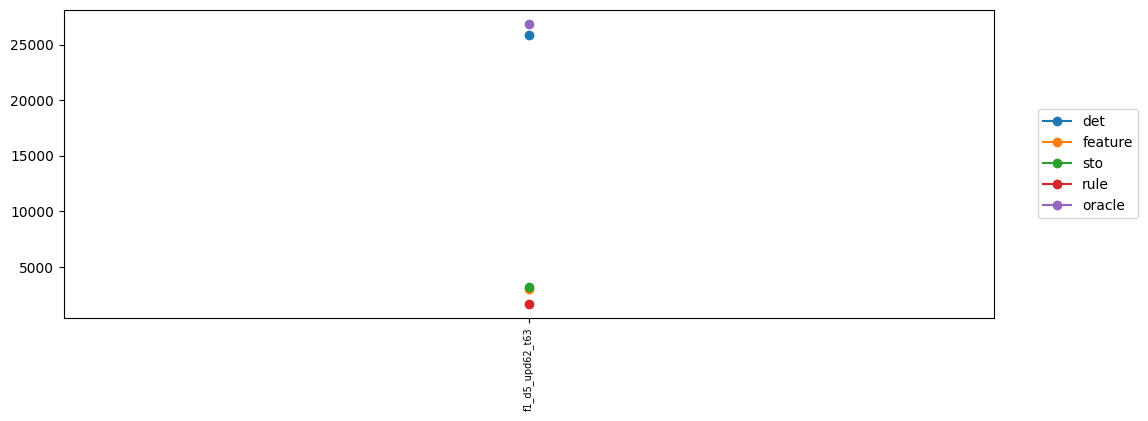

In [12]:
data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule','oracle']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT Profit
7) Battery dynamics

### Test case: d5 upd62 t63  
(Where deterministic model has a peak performance)

In [13]:
# Select plot parameters
choose_id = fixd5[0]
save = True #True or False
model = 'Sto' # Oracle, Rule, Det, Sto, Feature,
Profit_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT Profit)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, Profit_plot);

Test case:  f1_d5_upd62_t63
+----------+----------+---------+-----------------+--------------+-----------+
|          |   Oracle |    Rule |   Deterministic |   Stochastic |   Feature |
+==========+==========+=========+=================+==============+===========+
| RT       |  26881.5 | 1678.07 |        25902.1  |      3157.92 |   3012.65 |
+----------+----------+---------+-----------------+--------------+-----------+
| Expected |  26881.5 | 2124.96 |         7588.77 |      2493.12 |   2319.46 |
+----------+----------+---------+-----------------+--------------+-----------+


In [ ]:
plot_coefficients_heatmap(results['Learn']['Bid'],save = True)
plt.show()

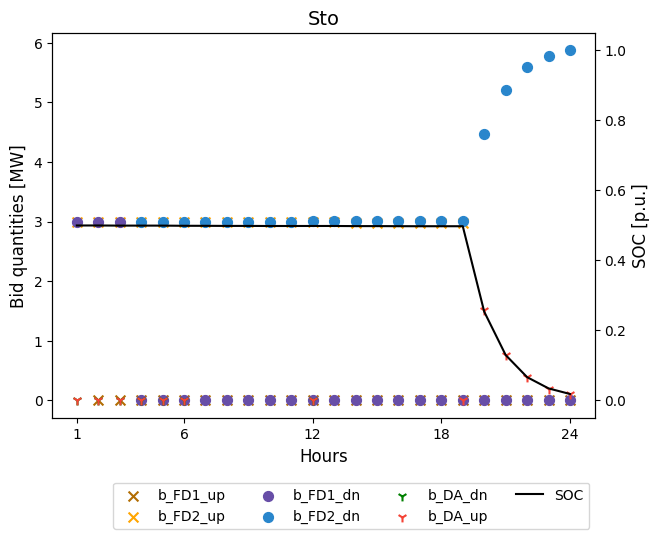

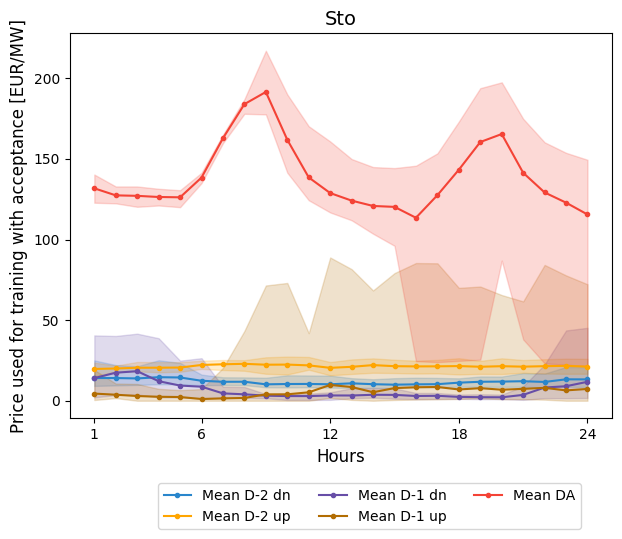

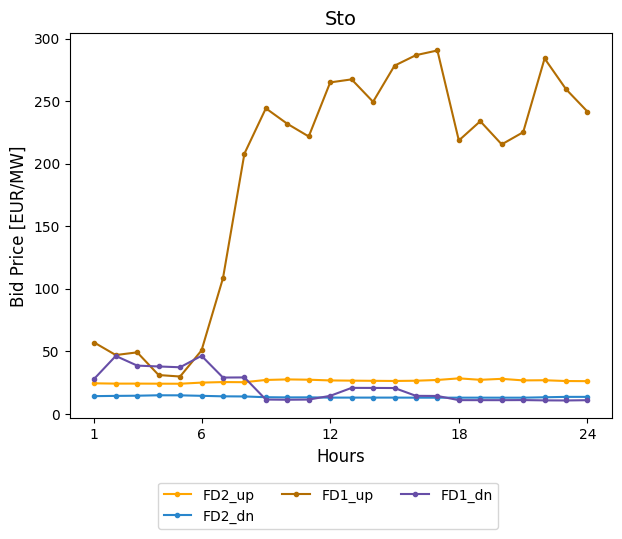

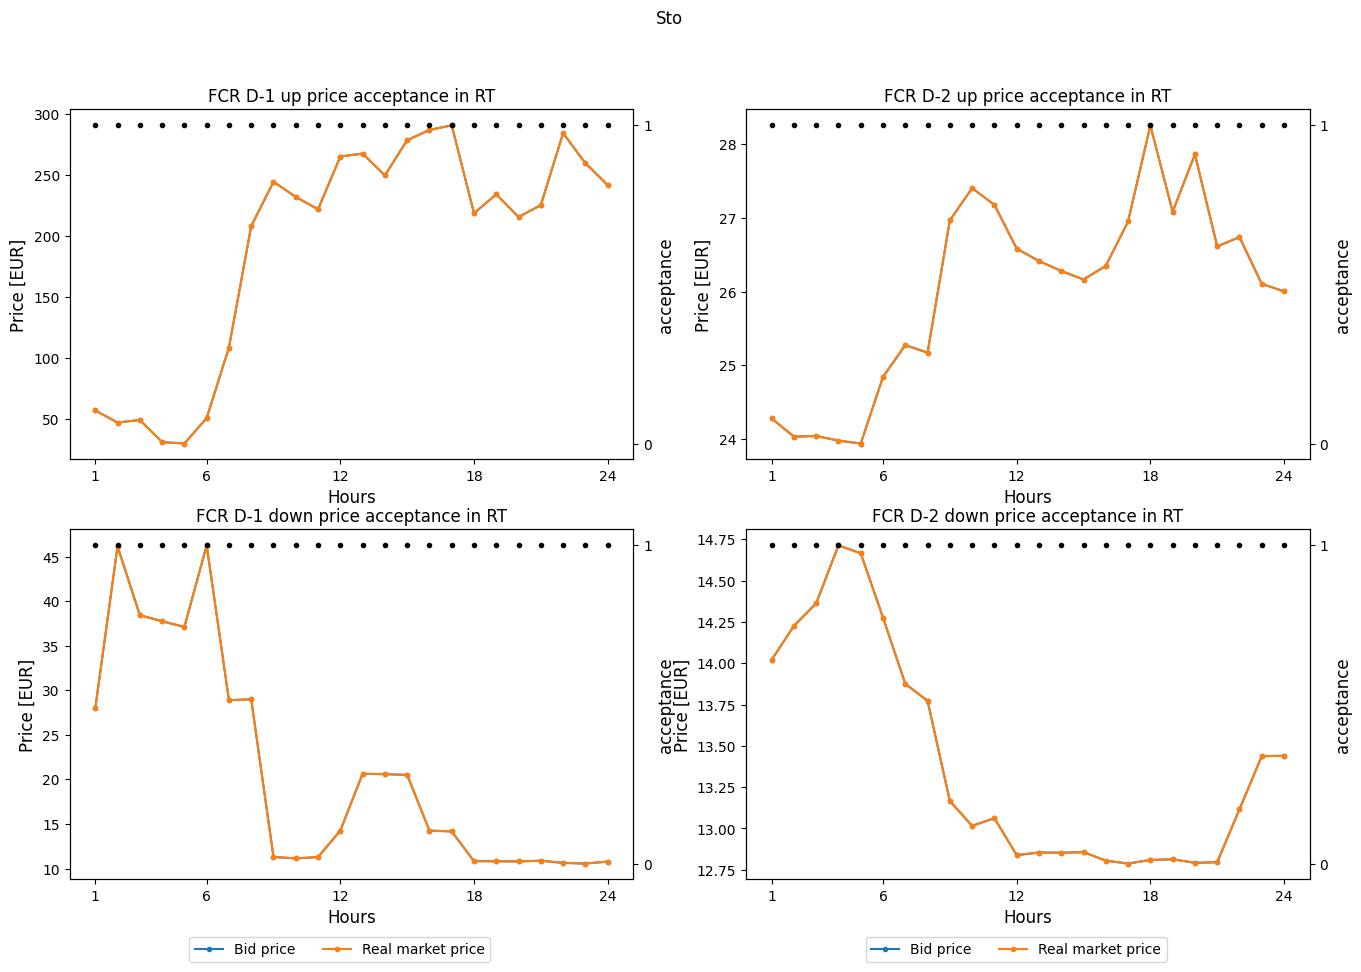

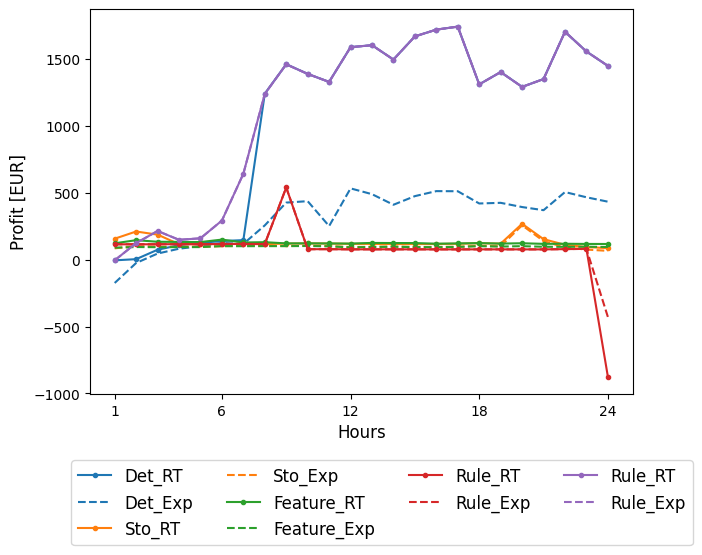

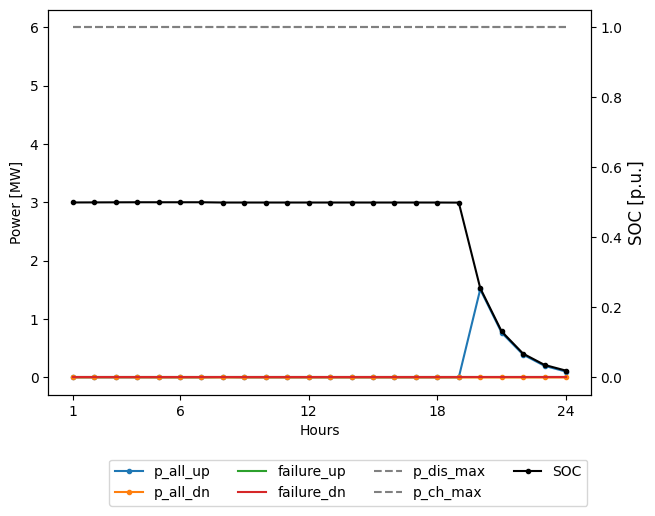

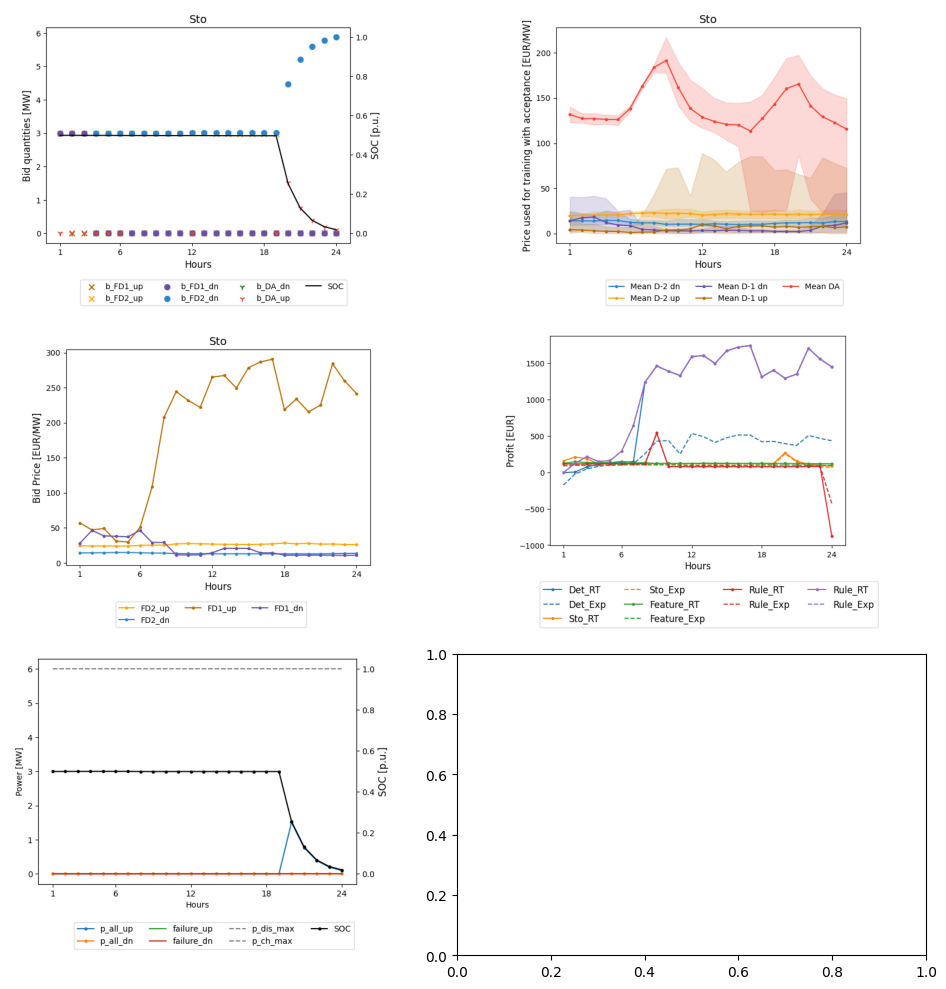

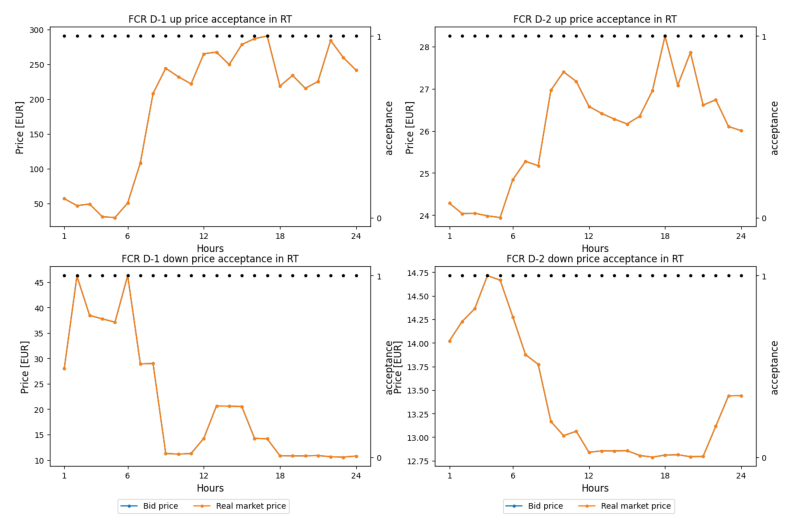

In [14]:
#View plots
view_plots(model, Profit_plot)
